In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
#đọc file dữ liệu
df1 = pd.read_excel("../Data/68IT1.xlsx", header = 9)
df2 = pd.read_excel("../Data/68IT2.xlsx", header = 9)
#lấy ra bảng điểm
tb_sc1 = df1.iloc[:, [6, 7, 8]]
tb_sc2 = df2.iloc[:, [6, 7, 8]]



In [3]:
#Đổi tên các cột
tb_sc1 = tb_sc1.rename(columns={'25%' : 'GK1', '25%.1' : 'GK2', 1 : 'CK'})
#1. Xóa các hàng mà 3 cột đều là NaN
tb_sc1 = tb_sc1.dropna(how='all')
#2. Xóa các hàng mà 2 cột đều là NaN(GK1 và GK2)
tb_sc1 = tb_sc1.dropna(subset=['GK1', 'GK2'], how='all')
#3. Xóa các hàng mà không có điểm cuối kỳ
tb_sc1 = tb_sc1.dropna(subset=['CK'], how='all')
#4. Chỉ điền 0 và các giá trị NaN dựa trên điều kiện mà không thay đổi cấu trúc DataFrame
tb_sc1[['GK1', 'GK2', 'CK']] = tb_sc1[['GK1', 'GK2', 'CK']].fillna(0)
#5. Xóa hàng cuối cùng
tb_sc1 = tb_sc1.iloc[: -1]



In [4]:
#Đổi tên các cột
tb_sc2 = tb_sc2.rename(columns={'25%' : 'GK1', '25%.1' : 'GK2', 1 : 'CK'})
#1. Xóa các hàng mà 3 cột đều là NaN
tb_sc2 = tb_sc2.dropna(how='all')
#2. Xóa các hàng mà 2 cột đều là NaN(GK1 và GK2)
tb_sc2 = tb_sc2.dropna(subset=['GK1', 'GK2'], how='all')
#3. Xóa các hàng mà không có điểm cuối kỳ
tb_sc2 = tb_sc2.dropna(subset=['CK'], how='all')
#4. Chỉ điền 0 vào các giá trị NaN dựa trên điều kiện mà không thay đổi cấu trúc DataFrame
tb_sc2[['GK1', 'GK2', 'CK']] = tb_sc2[['GK1', 'GK2', 'CK']].fillna(0)
#5. Xóa hàng cuối cùng
tb_sc2 = tb_sc2.iloc[: -1]
tb_sc2

,GK1,GK2,CK
0,5.0,5.0,3.0
1,5.5,7.5,4.5
2,0.0,1.0,0.0
3,3.5,3.5,0.5
4,2.5,7.5,2.0
5,6.0,10.0,8.0
6,9.5,8.0,8.5
8,2.5,4.0,1.5
9,1.5,7.5,6.5
11,5.0,4.0,1.5


In [5]:
#Nối 2 bảng điểm 
tb_sc = pd.concat([tb_sc1, tb_sc2], ignore_index=True)
tb_sc

,GK1,GK2,CK
0,4.5,9.5,2.5
1,6.0,6.0,2.0
2,7.5,9.0,4.5
3,4.0,10.0,3.0
4,6.5,5.0,0.5
...,...,...,...
97,2.0,3.0,0.5
98,6.0,1.5,2.0
99,0.5,0.0,0.0
100,7.5,8.0,4.0


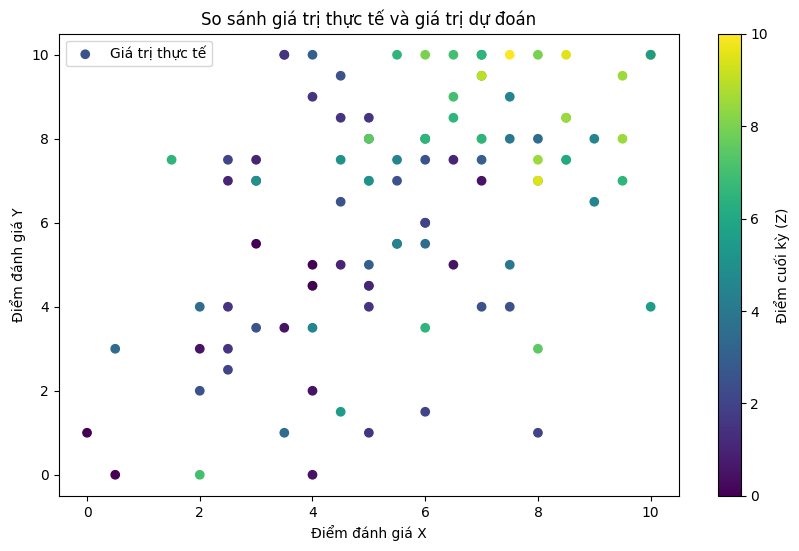

In [6]:
#Trực quan hóa dữ liệu
plt.figure(figsize=(10, 6))
plt.scatter(tb_sc['GK1'], tb_sc['GK2'], c=tb_sc['CK'], cmap='viridis', marker='o', label='Giá trị thực tế')

plt.colorbar(label='Điểm cuối kỳ (Z)')
plt.title('So sánh giá trị thực tế và giá trị dự đoán')
plt.xlabel('Điểm đánh giá X')
plt.ylabel('Điểm đánh giá Y')
plt.legend()
plt.show()

In [7]:
#lấy ra đặc trưng và đích
features = tb_sc[['GK1', 'GK2']]
labels = tb_sc[['CK']]

In [8]:
#khai báo thư viện sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [9]:
#chia dữ liệu thành tập huấn luyện và kiểm thử
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)


In [10]:
# Tạo mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
#dự đoán trên tập kiểm thử
y_pred = model.predict(X_test)

In [12]:
#đánh giá mô hình
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 5.461557751171639


In [13]:
#Xem các hệ số của phương trinh
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [[0.55952957 0.25437705]]
Intercept: [-0.56406097]


In [14]:
#Dự đoán cho x và y ngẫu nhiên
new_data = np.array([[7.5, 8.0]])
predicted_z = model.predict(new_data)
print(f"Dự đoán giá trị z cho x = 7.5 và y = 8.0 là: {predicted_z[0]}")

Dự đoán giá trị z cho x = 7.5 và y = 8.0 là: [5.66742723]


e:\New folder\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


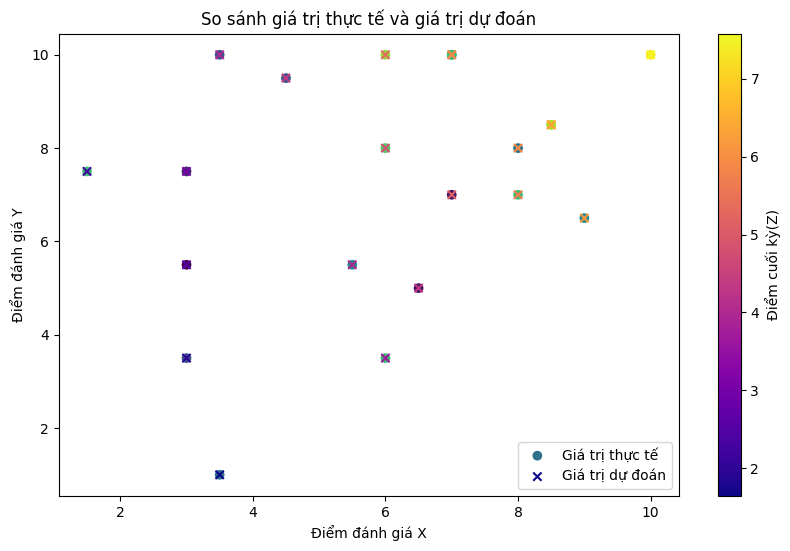

In [15]:
#Trực quan hóa kết quả 
plt.figure(figsize=(10, 6))
#vẽ điểm thực tế
plt.scatter(X_test['GK1'], X_test['GK2'], c = y_test['CK'], cmap = 'viridis', marker = 'o', label='Giá trị thực tế')

#Vẽ điểm dự đoán
plt.scatter(X_test['GK1'], X_test['GK2'], c =  y_pred, cmap='plasma', marker='x', label='Giá trị dự đoán')


#Thêm thanh màu cho màu sắc
plt.colorbar(label = 'Điểm cuối kỳ(Z)')
plt.title('So sánh giá trị thực tế và giá trị dự đoán')
plt.xlabel('Điểm đánh giá X')
plt.ylabel('Điểm đánh giá Y')
plt.legend()
plt.show()